In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import learning_curve, train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [2]:
df_data = pd.read_csv('data/data1.csv')
df_data.head()

,id,cycle,p00,p01,p02,p03,p04,p05,p06,p07,...,p16,p17,p18,p19,p20,s1,s2,ctf,binar,multi
0,1,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,...,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004,191,0,0
1,1,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,...,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003,190,0,0
2,1,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,...,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003,189,0,0
3,1,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,...,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000,188,0,0
4,1,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,...,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002,187,0,0


In [3]:
correl_features = ['p03', 'p18', 'p13', 'p12', 'p17', 'p20', 'p19', 'p04', 'p14', 'p08', 'p11', 'p06', 'p15', 'p02']
data = df_data[correl_features]

In [4]:
target = df_data['ctf']

In [5]:
#Здесь и далее для разбивки на test- и train- выборки будем использовать learning_curve и train_test_split
train_sizes, train_scores, test_scores = learning_curve(linear_model.LinearRegression(), data, target, 
                                                         train_sizes = np.arange(0.1, 1, 0.1), cv=3)

In [6]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[1075 2151 3227 4303 5379 6454 7530 8606 9682]
[0.7240562  0.70871889 0.69052695 0.68206387 0.67633693 0.63971582
 0.61924014 0.58789374 0.59134879]
[0.49264496 0.57154549 0.5831544  0.59052783 0.59573578 0.59352773
 0.59331858 0.58081247 0.58172585]


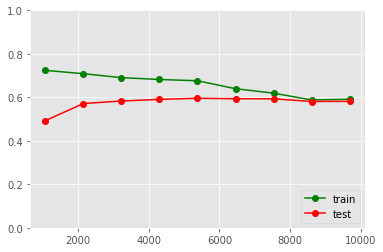

In [7]:
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker = 'o', label = 'train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker = 'o', label = 'test')
plt.ylim((0, 1))
plt.legend(loc = 'lower right')

In [8]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.3, random_state = 2)
print('Training data Shape:', train_data.shape)
print('Training target Shape:', train_target.shape)
print('Testing data Shape:', test_data.shape)
print('Testing target Shape:', test_target.shape)

Training data Shape: (11296, 14)
Training target Shape: (11296,)
Testing data Shape: (4842, 14)
Testing target Shape: (4842,)


In [9]:
linreg = linear_model.LinearRegression()
linreg.fit(train_data, train_target)

test_predict = linreg.predict(test_data)
train_predict = linreg.predict(train_data)

print('R^2 обучающая выборка: %.3f, R^2 тестовая выборка: %.3f' % (
      (metrics.r2_score(train_target, train_predict)), 
      (metrics.r2_score(test_target, test_predict))))

regr_metrics = {'RMSE' : metrics.mean_squared_error(test_target, test_predict)**0.5,
                'MAE' : metrics.mean_absolute_error(test_target, test_predict),
                'R^2' : metrics.r2_score(test_target, test_predict),
                'EV' : metrics.explained_variance_score(test_target, test_predict)}

df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
df_regr_metrics.columns = ['Линейная регрессия']
df_regr_metrics

R^2 обучающая выборка: 0.592, R^2 тестовая выборка: 0.595


,Линейная регрессия
RMSE,42.224745
MAE,32.274158
R^2,0.594953
EV,0.594964


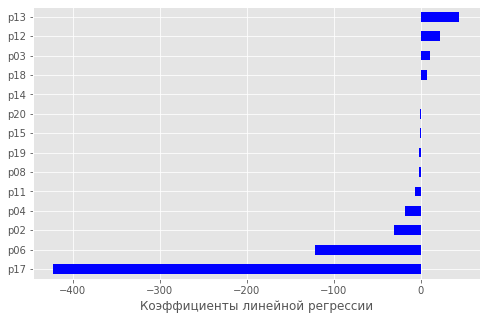

In [10]:
K = pd.DataFrame({'Коэффициенты':linreg.coef_}, train_data.columns)
K.sort_values(by='Коэффициенты', ascending=True).plot(kind='barh', color='b', figsize=(8,5))
plt.xlabel('Коэффициенты линейной регрессии')
plt.gca().legend_ = None

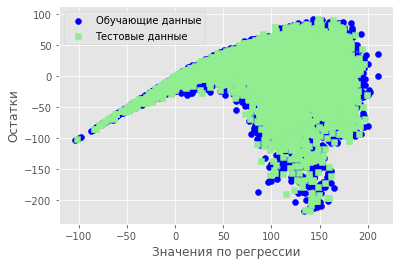

In [11]:
plt.scatter(train_predict, train_predict - train_target, c='blue', marker='o', label='Обучающие данные')
plt.scatter(test_predict, test_predict - test_target, c='lightgreen', marker='s', label='Тестовые данные')
plt.xlabel('Значения по регрессии')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.show()

In [12]:
poly = PolynomialFeatures(degree=3)

train_poly = poly.fit_transform(train_data)
test_poly = poly.fit_transform(test_data)

polyreg = linear_model.LinearRegression()
polyreg.fit(train_poly, train_target)

poly_test_predict = polyreg.predict(test_poly)
poly_train_predict = polyreg.predict(train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(train_target, poly_train_predict)), 
      (metrics.r2_score(test_target, poly_test_predict))))
regr_metrics = {'RMSE' : metrics.mean_squared_error(test_target, poly_test_predict)**0.5,
                'MAE' : metrics.mean_absolute_error(test_target, poly_test_predict),
                'R^2' : metrics.r2_score(test_target, poly_test_predict),
                'EV' : metrics.explained_variance_score(test_target, poly_test_predict)}

df_polyreg_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
df_polyreg_metrics.columns = ['Полиномиальная регрессия']
df_polyreg_metrics

R^2 training: 0.648, R^2 test: 0.609


,Полиномиальная регрессия
RMSE,41.462607
MAE,30.179693
R^2,0.609443
EV,0.609461


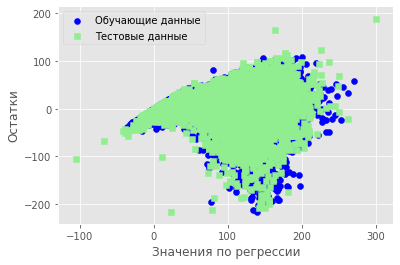

In [13]:
plt.scatter(poly_train_predict, poly_train_predict - train_target, c='blue', marker='o', label='Обучающие данные')
plt.scatter(poly_test_predict, poly_test_predict - test_target, c='lightgreen', marker='s', label='Тестовые данные')
plt.xlabel('Значения по регрессии')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.show()

In [19]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(n_estimators=40, max_features=2, 
                                                                              max_depth=10, n_jobs=-1, random_state=1), 
                                                        data, target, train_sizes = np.arange(0.1, 1, 0.1), cv=3)

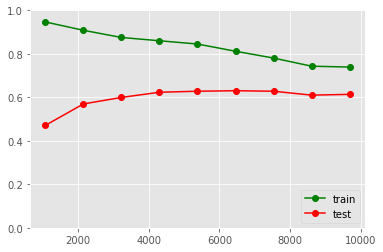

In [20]:
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker = 'o', label = 'train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker = 'o', label = 'test')
plt.ylim((0, 1))
plt.legend(loc = 'lower right')

In [21]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 2)

In [22]:
rf = RandomForestRegressor(n_estimators=40, max_features=2, max_depth=10, n_jobs=-1, random_state=1)

rf.fit(train_data, train_target)

rf_test_predict = rf.predict(test_data)
rf_train_predict = rf.predict(train_data)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(train_target, rf_train_predict)), 
      (metrics.r2_score(test_target, rf_test_predict))))

rf_metrics = {'RMSE' : metrics.mean_squared_error(test_target, rf_test_predict)**0.5,
              'MAE' : metrics.mean_absolute_error(test_target, rf_test_predict),
              'R^2' : metrics.r2_score(test_target, rf_test_predict),
              'EV' : metrics.explained_variance_score(test_target, rf_test_predict)}

df_rf_metrics = pd.DataFrame.from_dict(rf_metrics, orient='index')
df_rf_metrics.columns = ['Random Forest']
df_rf_metrics

R^2 training: 0.726, R^2 test: 0.648


,Random Forest
RMSE,39.593092
MAE,28.488025
R^2,0.648037
EV,0.648091


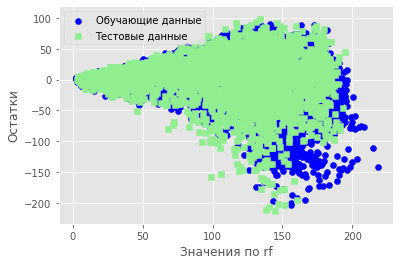

In [23]:
plt.scatter(rf_train_predict, rf_train_predict - train_target, c='blue', marker='o', label='Обучающие данные')
plt.scatter(rf_test_predict, rf_test_predict - test_target, c='lightgreen', marker='s', label='Тестовые данные')
plt.xlabel('Значения по rf')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.show()

Как видно, из реализованных алгоритмов предпочтение следует отдать нелинейным моделям, в частности  - Random Forest, со среднеквадратичным отклонением в 39,59 цикла. Также следует учесть, что параметры Random Forest Regressor были выбраны вручную, но для лучших результатов можно использовать Grid Search или случайный поиск с кросс-валидацией.